<a href="https://colab.research.google.com/github/AryanNesti/Logistic-Regression/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setup
You will deliver this assignment in the form of a Colab notebook (or a Github repo if you like). Both must be configured to allow anyone to run the code (in Colab this is Run All) and get the results. Setup your environment that can automatically download the data from Kaggle and store them in a location. You may want to read for this task and ensure that this task is implemented with Python.

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c avazu-ctr-prediction

import zipfile
with zipfile.ZipFile("/content/avazu-ctr-prediction.zip", "r") as zip_ref:
  zip_ref.extractall('/content/data')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
avazu-ctr-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import pandas as pd
import math
train_df = pd.read_csv("data/train.gz", nrows=100000)
print(train_df.head())

             id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0  14102100  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0  14102100  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0  14102100  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0  14102100  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain  ... device_type device_conn_type    C14  \
0      28905ebd  ecad2386   7801e8d9  ...           1                2  15706   
1      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
2      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
3      28905ebd  ecad2386   7801e8d9  ...           1                0  15706   
4      0569f928  ecad2386   7801e8d9  ...           1                0  18993   

   C15  C16   C17  C18  C19     C20  C21  
0  320   50  

# Data Preprocessing
Preprocess the data you are given to your liking. This may include dropping some columns you wont use, addressing noisy or missing data etc.

In [ ]:
train_df.drop('app_id', axis=1, inplace=True)
train_df.drop('app_domain', axis=1, inplace=True)
train_df.drop('app_category', axis=1, inplace=True)
train_df.drop('id', axis=1, inplace=True)
train_df.drop('hour', axis=1, inplace=True)
train_df.drop('site_id', axis=1, inplace=True)
train_df.drop('site_domain', axis=1, inplace=True)
train_df.drop('site_category', axis=1, inplace=True)
train_df.drop('device_ip', axis=1, inplace=True)
train_df.drop('device_model', axis=1, inplace=True)
train_df.drop('device_id', axis=1, inplace=True)
train_df.head(50)

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,1,2,15706,320,50,1722,0,35,-1,79
1,0,1005,0,1,0,15704,320,50,1722,0,35,100084,79
2,0,1005,0,1,0,15704,320,50,1722,0,35,100084,79
3,0,1005,0,1,0,15706,320,50,1722,0,35,100084,79
4,0,1005,1,1,0,18993,320,50,2161,0,35,-1,157
5,0,1005,0,1,0,16920,320,50,1899,0,431,100077,117
6,0,1005,0,1,0,20362,320,50,2333,0,39,-1,157
7,0,1005,1,1,0,20632,320,50,2374,3,39,-1,23
8,1,1005,0,1,2,15707,320,50,1722,0,35,-1,79
9,0,1002,0,0,0,21689,320,50,2496,3,167,100191,23


In [ ]:
train = train_df.sample(frac=0.8).sample(frac=1, ignore_index=True)
test = train_df.drop(train.index).sample(frac=1, ignore_index=True)


ytrain = train['click']
ytest = test['click']
xtrain = train.drop('click', axis=1)
xtest = test.drop('click', axis=1)
thetas = np.zeros(xtrain.shape[1])

# Logistic Regression
Write from scratch the logistic regression solution to the prediction problem that can work with Stochastic Gradient Descent (SGD). You can only use pandas and numpy to do so.

Show clearly all equations of the gradient and include comments in either markdown or Python (inline to code) explaining every stage of processing. Also, highlight any enhancements you may have done to improve performance such as regularization.

In [ ]:
# This is the normalized X to help predict with a range of 0 to 1
X_norm = (xtrain - xtrain.min()) / (xtrain.max() - xtrain.min())
X = X_norm

# This function returns the logistic regression
def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

# This function gets the likely hood of an example
def _negative_log_likelihood(x, y, theta) -> float:
  if y == 1:
    return -math.log(logistic(np.dot(x, theta)))
  else:
    return -math.log(1 - logistic(np.dot(x, theta)))

# This function adds up the liklihoods of the examples
def negative_log_likelihood(x, y, theta) -> float:
  temp = [0] * len(theta)
  for i in range(len(y)):
    temp[i] = (_negative_log_likelihood(x[i:i+1], int(y[i:i+1]), theta))
  return np.sum(temp)

def _negative_log_partial_j(x, y, theta, j) -> float: 
    """The jth partial derivative for one data point. Here i is the index of the data point."""
    return -(y - logistic(np.dot(x, theta))) * x[j]

# This function gives the gradient of the example
def _negative_log_gradient(x, y, w):
  return np.array([_negative_log_partial_j(x.iloc[0], y.iloc[0], w, j) for j in range(len(w))])

# This function adds the gradient of the examples
def negative_log_gradient(x, y, theta):
  temp = [0] * len(theta)
  for i in range(len(y)):
    temp += _negative_log_gradient(x[i:i+1], y[i:i+1], theta)
  return temp


In [ ]:
# This function calculates the SGD
def stochastic_gradient_descent(X,y,theta,lr,n_epochs=10):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
      loss = 0.0
      for i in range(len(y)):
        rand_index = np.random.randint(len(y))
        ind_x = X[rand_index:rand_index+1]
        ind_y = y[rand_index:rand_index+1]
        
        gradient = negative_log_gradient(ind_x, ind_y, theta) 
        theta = theta - lr * gradient
        loss += negative_log_likelihood(ind_x, ind_y, theta)
      c_hist[epoch] = loss
    return theta,c_hist

In [ ]:
# theta = w
lr = 0.001
theta,cost_history = stochastic_gradient_descent(X,ytrain,thetas,lr)

theta, cost_history

(array([-0.68146388,  0.60248965, -0.37571507, -0.19920777, -0.36445773,
        -0.53782907,  1.86785149, -0.06137944, -0.35518565,  0.64158769,
        -0.18122489, -1.46274656]),
 [36180.55083606157,
  35452.59562532289,
  35629.229886339825,
  35765.8090869791,
  35451.30243947408,
  35526.38124565849,
  35401.3703851455,
  35489.97858499834,
  35113.88266686572,
  35437.352578070764],
 3.6112249094862565)

# Performance Results
Plot the precision vs recall curve of your classifier. Clearly explain the tradeoff between the two quantities and the shape of the curve.

In [ ]:
# This function is for the performance results
def PRC(x , y , theta):
    thresh = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    pred = 0
    precision = []
    recall = []
    for i in thresh:
        tp = 0
        fp = 0
        fn = 0 
        for z in range(len(y)):
            if i <= np.dot(x,theta)[z]:
                pred = 1
            else:
                pred = 0
            
            if pred == y[z]:
                tp += 1
            elif pred == 1 and y[z] == 0:
                fp += 1
            elif pred == 0 and y[z] == 1:
                fn += 1
        precision.append(tp/(tp + fp))
        recall.append(tp/(tp + fn))
    return precision, recall

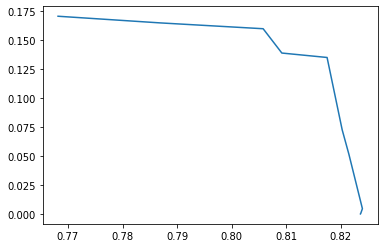

In [ ]:
X_test = (xtest - xtest.min()) / (xtest.max() - xtest.min())
precision, recall = PRC(X_test, ytest, -1*theta)
import matplotlib.pyplot as plt
plt.plot(np.array([1] * len(precision)) - np.array(precision), np.array([1] * len(recall)) - np.array(recall))
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
